# This notebook combines the processed datasets and runs predictions for getting quality of life.

In [38]:
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10, 10)
import folium
import seaborn as sns

In [39]:
df_911=pd.read_csv("911-scores.csv")

In [40]:
df_water=pd.read_csv("waterPollution.csv")

In [41]:
df_311=pd.read_csv("311_scores.csv")

In [42]:
df_911.head(5)

,zip,date,911-score
0,17329,2016-04-01,9.96875
1,17329,2016-08-01,9.96875
2,17352,2016-06-01,9.96875
3,17352,2016-11-01,9.93750
4,17352,2016-12-01,9.93750


In [43]:
df_311.head(10)

,CreatedDate,ZipCode,avg_score
0,2014-01-01,21093,9.814815
1,2014-01-01,21201,7.731481
2,2014-01-01,21202,9.212963
3,2014-01-01,21205,7.314815
4,2014-01-01,21206,6.685185
5,2014-01-01,21207,7.574074
6,2014-01-01,21208,9.583333
7,2014-01-01,21209,8.981481
8,2014-01-01,21210,9.972222
9,2014-01-01,21211,7.953704


In [44]:
df_water.head(5)

,date,water_score,zip
0,1997-05-09,8.413794,21206
1,1997-05-09,8.280461,21206
2,1997-06-09,8.572210,21206
3,1997-06-09,8.538877,21206
4,1997-07-07,8.160757,21206


### Standardizing column names to combine dataframes.

In [45]:
df_311.columns=['date','zip','311_score']

In [46]:
df_911.columns=['zip','date','911_score']

In [47]:
df_311['zip']=df_311['zip'].astype(str)
df_311.head(10)

,date,zip,311_score
0,2014-01-01,21093,9.814815
1,2014-01-01,21201,7.731481
2,2014-01-01,21202,9.212963
3,2014-01-01,21205,7.314815
4,2014-01-01,21206,6.685185
5,2014-01-01,21207,7.574074
6,2014-01-01,21208,9.583333
7,2014-01-01,21209,8.981481
8,2014-01-01,21210,9.972222
9,2014-01-01,21211,7.953704


In [48]:
df_311['zip']=df_311['zip'].str[0:5]

In [49]:
df_311['zip']=df_311['zip'].astype(int)

### Standardize the datatypes.

In [50]:
df_water['date']=pd.to_datetime(df_water['date'])
df_911['date']=pd.to_datetime(df_911['date'])
df_311['date']=pd.to_datetime(df_311['date'])
df_water['date']=df_water['date'].values.astype('datetime64[M]')
df_311['date']=df_311['date'].values.astype('datetime64[M]')

In [51]:
df_water.head(5)

,date,water_score,zip
0,1997-05-01,8.413794,21206
1,1997-05-01,8.280461,21206
2,1997-06-01,8.572210,21206
3,1997-06-01,8.538877,21206
4,1997-07-01,8.160757,21206


### Merge 311 and Water dataset

In [52]:
df_311_water=pd.merge(df_311,df_water,left_on=['zip','date'],right_on=['zip','date'],how='left')

In [53]:
df_311.dtypes

date         datetime64[ns]
zip                   int64
311_score           float64
dtype: object

In [54]:
df_water.dtypes

date           datetime64[ns]
water_score           float64
zip                     int64
dtype: object

In [55]:
df_311_water

,date,zip,311_score,water_score
0,2014-01-01,21093,9.814815,NaN
1,2014-01-01,21201,7.731481,NaN
2,2014-01-01,21202,9.212963,NaN
3,2014-01-01,21205,7.314815,NaN
4,2014-01-01,21206,6.685185,NaN
5,2014-01-01,21207,7.574074,NaN
6,2014-01-01,21208,9.583333,NaN
7,2014-01-01,21209,8.981481,NaN
8,2014-01-01,21210,9.972222,NaN
9,2014-01-01,21211,7.953704,NaN


### Creating a dataframe by merging all the datasets

In [56]:
df_merge=pd.merge(df_311_water,df_911,left_on=['zip','date'],right_on=['zip','date'],how='left')

In [57]:
df_merge

,date,zip,311_score,water_score,911_score
0,2014-01-01,21093,9.814815,NaN,NaN
1,2014-01-01,21201,7.731481,NaN,NaN
2,2014-01-01,21202,9.212963,NaN,NaN
3,2014-01-01,21205,7.314815,NaN,NaN
4,2014-01-01,21206,6.685185,NaN,NaN
5,2014-01-01,21207,7.574074,NaN,NaN
6,2014-01-01,21208,9.583333,NaN,NaN
7,2014-01-01,21209,8.981481,NaN,NaN
8,2014-01-01,21210,9.972222,NaN,NaN
9,2014-01-01,21211,7.953704,NaN,NaN


### Generating final scores

In [61]:
df_merge['final_score']=df_merge[['311_score', 'water_score','911_score']].mean(axis=1)

In [85]:
df_merge['cap']=10
df_merge['floor'] = 0
df_merge.head()

,date,zip,311_score,water_score,911_score,final_score,cap,floor
0,2014-01-01,21093,9.814815,NaN,NaN,9.814815,10,0
1,2014-01-01,21201,7.731481,NaN,NaN,7.731481,10,0
2,2014-01-01,21202,9.212963,NaN,NaN,9.212963,10,0
3,2014-01-01,21205,7.314815,NaN,NaN,7.314815,10,0
4,2014-01-01,21206,6.685185,NaN,NaN,6.685185,10,0


#### Predictions

Since the focus of this project was generating scores and analyzing patterns, for predictions we've used a library called fb-prophet for predicting time series based data. Using Prophet we generated predictions for the next 6 months for any given zipcode. We've adjusted the model by reducing the flexibility of the trends and adding floor and cap values. This gave us a much conservative and realistic predictions for future.

In [86]:
from fbprophet import Prophet

In [96]:
def predict_future(df):    
    m = Prophet(changepoint_prior_scale=0.001,growth='logistic')
    m.fit(df)
    future=m.make_future_dataframe(periods=180)
    future['cap']=10
    future['floor']=0
    forecast=m.predict(future)
    forecast.plot(x='ds',y='yhat')
#     m.plot(forecast)
    m.plot_components(forecast)

In [92]:
df=df_merge
df=df.drop(columns=['311_score','water_score','911_score'])
df.columns=['ds','zip','y','cap','floor']
df.head()

,ds,zip,y,cap,floor
0,2014-01-01,21093,9.814815,10,0
1,2014-01-01,21201,7.731481,10,0
2,2014-01-01,21202,9.212963,10,0
3,2014-01-01,21205,7.314815,10,0
4,2014-01-01,21206,6.685185,10,0


# Now we shall visualize the trends and predictions for some zipcodes.

### ZipCode : 21206 trends and predictions for next 6 months.

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/media/vabbie/D/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


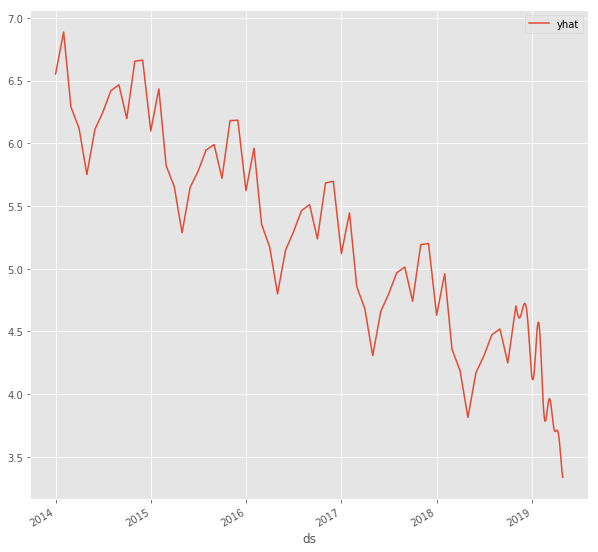

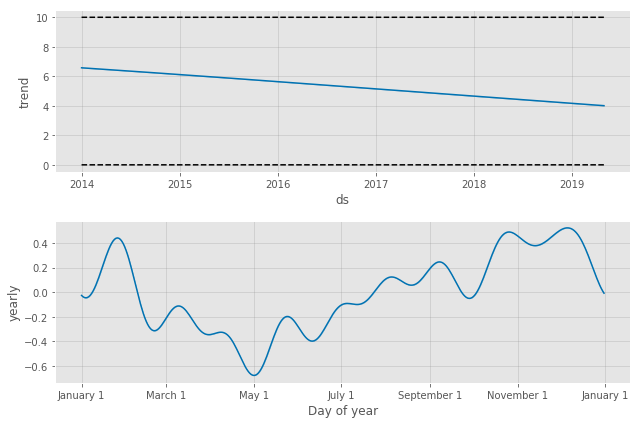

In [97]:
predict_future(df[df['zip'] == 21206])

### ZipCode : 21230 trends and predictions for next 6 months.

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/media/vabbie/D/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


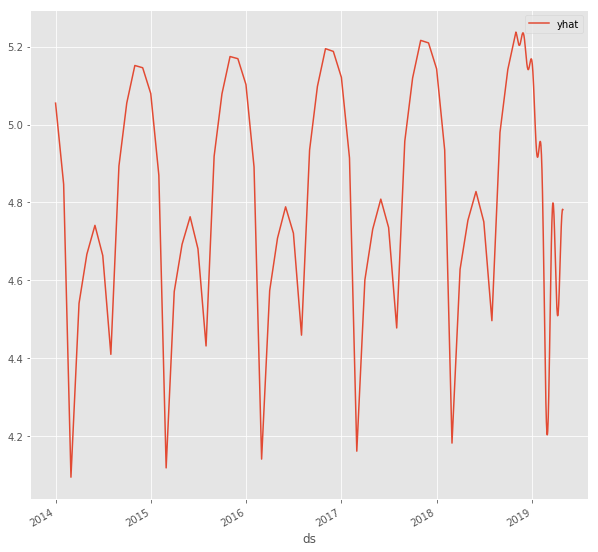

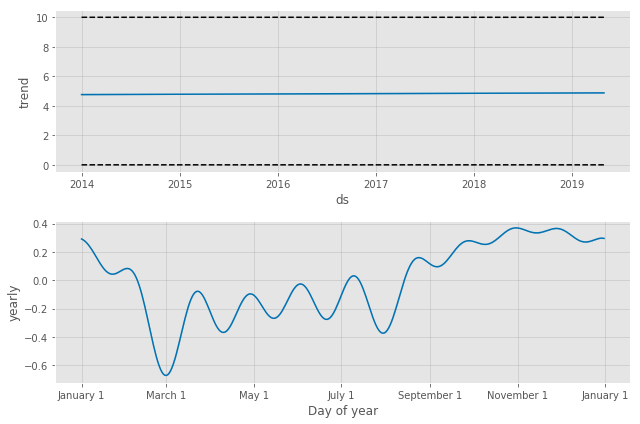

In [98]:
predict_future(df[df['zip'] == 21230])

### ZipCode : 21212 trends and predictions for next 6 months.

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/media/vabbie/D/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


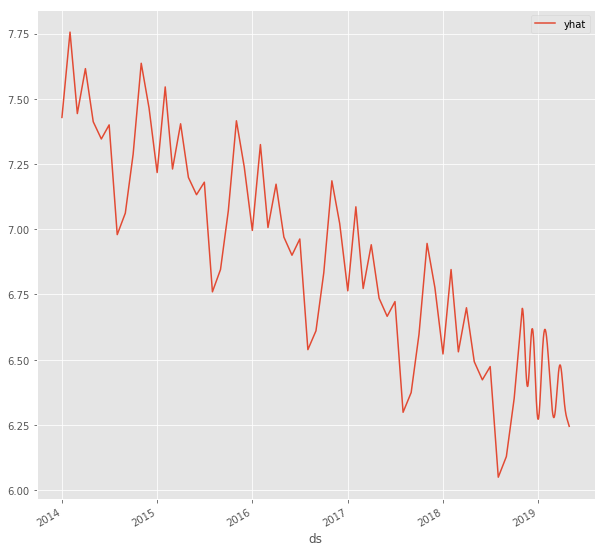

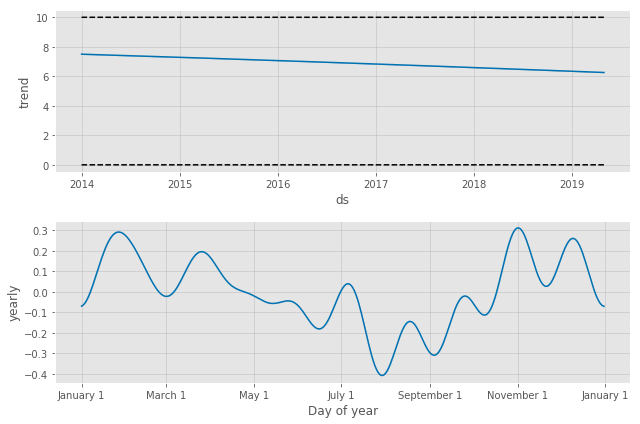

In [99]:

predict_future(df[df['zip'] == 21212])

### ZipCode : 21213 trends and predictions for next 6 months.

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/media/vabbie/D/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


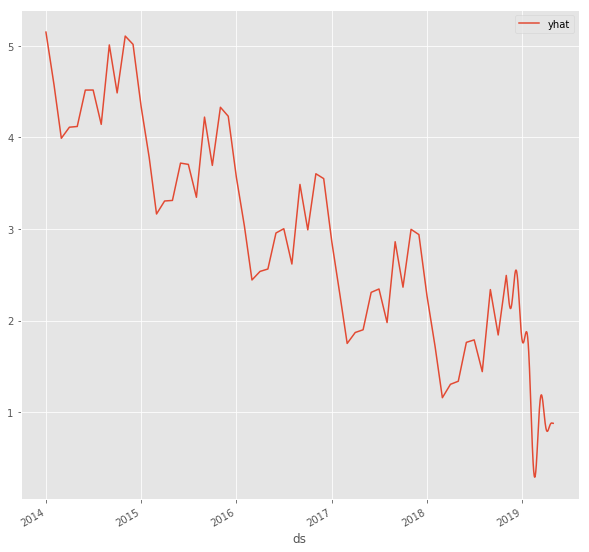

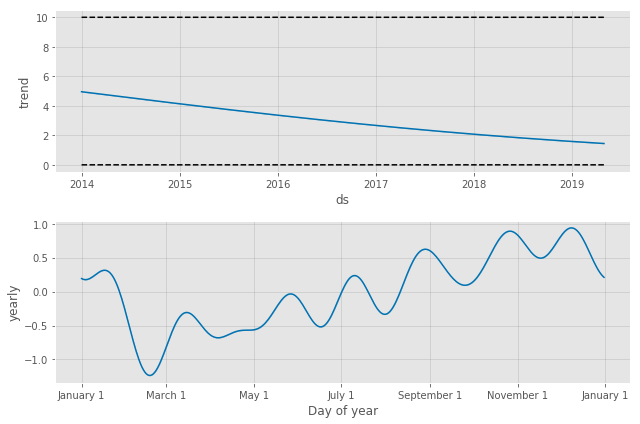

In [100]:
predict_future(df[df['zip'] == 21213])

### ZipCode : 21214 trends and predictions for next 6 months.

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/media/vabbie/D/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


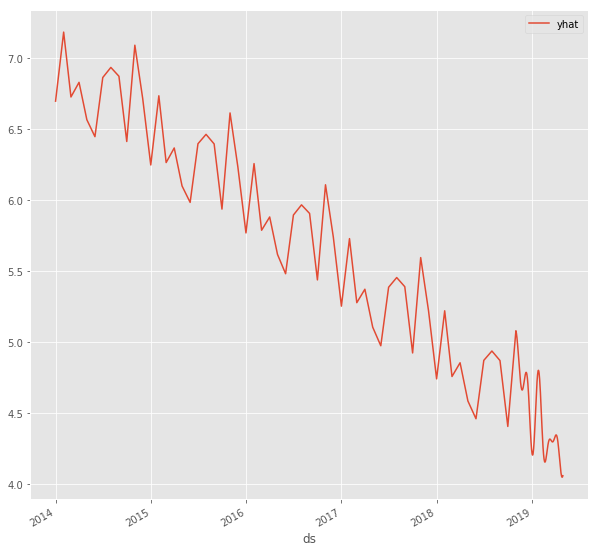

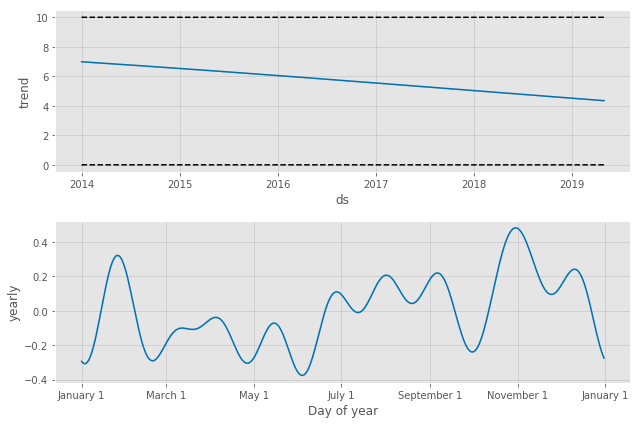

In [101]:
predict_future(df[df['zip'] == 21214])

### The trends suggest that overall quality scores for the above zipcodes are declining. 